In [54]:
from keras.datasets import mnist
from matplotlib import pyplot as plt


In [2]:
from keras import layers
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras import models
from keras.optimizers import Adam
import numpy as np

In [3]:
#Download the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
x_val=x_test[:5000]
x_test=x_test[5000:]
y_val=y_test[:5000]
y_test=y_test[5000:]

In [6]:
print(x_val.shape,y_val.shape,x_test.shape,y_test.shape)

(5000, 28, 28) (5000,) (5000, 28, 28) (5000,)


In [7]:
def change_into_binary_array(a):
    p=[]
    for i in a:
        l=[0]*10
        l[i-1]=1
        p.append(l)
    return np.array(p)
y_train=change_into_binary_array(y_train)
y_test=change_into_binary_array(y_test)
y_val=change_into_binary_array(y_val)

In [8]:
print(y_train.shape,y_test.shape,y_val.shape)

(60000, 10) (5000, 10) (5000, 10)


In [9]:
def RBF(x,c,s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))

In [55]:
#First Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model1=models.Sequential()
model1.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model1.add(layers.Dense(64,activation='sigmoid'))
model1.add(layers.Dense(32,activation='sigmoid'))
model1.add(layers.Dense(16,activation='sigmoid'))
model1.add(layers.Dense(10,activation='softmax'))
print(model1.summary())
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#     Sigmoid : (1/1+e^-x)
    
#     Relu: max(0,x)
    
#     Leaky Relu: max(0.01x,x)
    
#     tanh: { e**x - e**(-x) } / { e**x + e**(-x) }
    
#     Problem with aboves : The gradient almost zero when z become too large or too small, which slows down the algorithm.
    
#     Why to use Softmax : Multi class Sigmoid e**x/ sum(e**xi) 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


'\n    Sigmoid : (1/1+e^-x)\n    \n    Relu: max(0,x)\n    \n    Leaky Relu: max(0.01x,x)\n    \n    tanh: { e**x - e**(-x) } / { e**x + e**(-x) }\n    \n    Problem with aboves : The gradient almost zero when z become too large or too small, which slows down the algorithm.\n    \n    Why to use Softmax : Multi class Sigmoid e**x/ sum(e**xi) \n'

In [11]:
#Fit the model one
history1=model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)


Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.1681 - accuracy: 0.6794 - val_loss: 0.7878 - val_accuracy: 0.7616
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.6159 - accuracy: 0.8253 - val_loss: 0.5991 - val_accuracy: 0.8128
Epoch 3/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.5065 - accuracy: 0.8514 - val_loss: 0.5156 - val_accuracy: 0.8484
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.4217 - accuracy: 0.8777 - val_loss: 0.4532 - val_accuracy: 0.8600
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3862 - accuracy: 0.8859 - val_loss: 0.4361 - val_accuracy: 0.8702
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3796 - accuracy: 0.8875 - val_loss: 0.4506 - val_accuracy: 0.8606
Epoch 7/10
60000/60000 [==============================] - 4s 61us/st

In [12]:
#Second Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model2=models.Sequential()
model2.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model2.add(layers.Dense(32,activation='sigmoid'))
model2.add(layers.Dense(16,activation='sigmoid'))
model2.add(layers.Dense(10,activation='softmax'))
print(model2.summary())
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history2=model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.0872 - accuracy: 0.7315 - val_loss: 0.6816 - val_accuracy: 0.7934
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.5452 - accuracy: 0.8410 - val_loss: 0.5391 - val_accuracy: 0.8398
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4570 - accuracy: 0.8637 - val_loss: 0.5558 - val_accuracy: 0.8114
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4337 - accuracy: 0.8687 - val_loss: 0.5071 - val_accuracy: 0.8374
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3975 - accuracy: 0.8795 - val_loss: 0.4506 - val_accuracy: 0.8676
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3891 - accuracy: 0.8823 - val_loss: 0.4693 - val_accuracy: 0.8572
Epoch 7/10
60000/60000 [==============================] - 3s 51us/ste

In [14]:
#Third Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model3=models.Sequential()
model3.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model3.add(layers.Dense(16,activation='sigmoid'))
model3.add(layers.Dense(10,activation='softmax'))
print(model3.summary())
model3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history3=model3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 1.0125 - accuracy: 0.7271 - val_loss: 0.6461 - val_accuracy: 0.8156
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5466 - accuracy: 0.8433 - val_loss: 0.5926 - val_accuracy: 0.8294
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4760 - accuracy: 0.8603 - val_loss: 0.5029 - val_accuracy: 0.8430
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.4474 - accuracy: 0.8682 - val_loss: 0.5283 - val_accuracy: 0.8414
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4444 - accuracy: 0.8688 - val_loss: 0.5054 - val_accuracy: 0.8496
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.4233 - accuracy: 0.8738 - val_loss: 0.5271 - val_accuracy: 0.8364
Epoch 7/10
60000/60000 [==============================] - 3s 51us/ste

In [16]:
#Fourth Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model4=models.Sequential()
model4.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model4.add(layers.Dense(64,activation='tanh'))
model4.add(layers.Dense(32,activation='tanh'))
model4.add(layers.Dense(16,activation='tanh'))
model4.add(layers.Dense(10,activation='softmax'))
print(model4.summary())
model4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
his4=model4.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.7608 - accuracy: 0.7671 - val_loss: 0.6224 - val_accuracy: 0.8034
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.5209 - accuracy: 0.8357 - val_loss: 0.5518 - val_accuracy: 0.8202
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.5030 - accuracy: 0.8390 - val_loss: 0.5197 - val_accuracy: 0.8348
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.4365 - accuracy: 0.8632 - val_loss: 0.4832 - val_accuracy: 0.8464
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.4087 - accuracy: 0.8720 - val_loss: 0.4940 - val_accuracy: 0.8442
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.4119 - accuracy: 0.8708 - val_loss: 0.4637 - val_accuracy: 0.8566
Epoch 7/10
60000/60000 [==============================] - 4s 61us/ste

In [18]:
#Fifth Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model5=models.Sequential()
model5.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model5.add(layers.Dense(64,activation='relu'))
model5.add(layers.Dense(32,activation='relu'))
model5.add(layers.Dense(16,activation='relu'))
model5.add(layers.Dense(10,activation='softmax'))
print(model5.summary())
model5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
his5=model5.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.4522 - accuracy: 0.6518 - val_loss: 0.6835 - val_accuracy: 0.8028
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4589 - accuracy: 0.8679 - val_loss: 0.4395 - val_accuracy: 0.8828
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2960 - accuracy: 0.9197 - val_loss: 0.3859 - val_accuracy: 0.9086
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2315 - accuracy: 0.9402 - val_loss: 0.2787 - val_accuracy: 0.9248
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1865 - accuracy: 0.9503 - val_loss: 0.2464 - val_accuracy: 0.9380
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1578 - accuracy: 0.9584 - val_loss: 0.2437 - val_accuracy: 0.9396
Epoch 7/10
60000/60000 [==============================] - 4s 64us/ste

In [53]:
#Dropout mainly comes to use in the case if some node in neural network completely decides the output which should not happen.
#Also it reduce the size of network which works better for us in case of variance

In [20]:
#Sixth Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model6=models.Sequential()
model6.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model6.add(layers.Dropout(0.9))
model6.add(layers.Dense(64,activation='relu'))
model6.add(layers.Dense(32,activation='relu'))
model6.add(layers.Dense(16,activation='relu'))
model6.add(layers.Dense(10,activation='softmax'))
print(model6.summary())
model6.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
__________________________________________________

In [21]:
his6=model6.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 4.7433 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1142
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.3028 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1142
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1142
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1142
Epoch 5/10
60000/60000 [==============================] - 4s 75us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1142
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1142
Epoch 7/10
60000/60000 [==============================] - 5s 78us/ste

In [22]:
#Seventh Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model7=models.Sequential()
model7.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model7.add(layers.Dropout(0.75))
model7.add(layers.Dense(64,activation='relu'))
model7.add(layers.Dense(32,activation='relu'))
model7.add(layers.Dense(16,activation='relu'))
model7.add(layers.Dense(10,activation='softmax'))
print(model7.summary())
model7.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
__________________________________________________

In [23]:
his7=model7.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 2.8922 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1142
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3013 - val_accuracy: 0.1142
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1142
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1142
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1142
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1142
Epoch 7/10
60000/60000 [==============================] - 5s 79us/ste

In [24]:
#Eight Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model8=models.Sequential()
model8.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(64,activation='relu'))
model8.add(layers.Dense(32,activation='relu'))
model8.add(layers.Dense(16,activation='relu'))
model8.add(layers.Dense(10,activation='softmax'))
print(model8.summary())
model8.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
__________________________________________________

In [25]:
his8=model8.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 2.9065 - accuracy: 0.2244 - val_loss: 1.6670 - val_accuracy: 0.3862
Epoch 2/10
60000/60000 [==============================] - 5s 75us/step - loss: 1.3827 - accuracy: 0.4918 - val_loss: 1.0598 - val_accuracy: 0.5934
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.8731 - accuracy: 0.6993 - val_loss: 0.5526 - val_accuracy: 0.8466
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.5147 - accuracy: 0.8578 - val_loss: 0.3725 - val_accuracy: 0.9040
Epoch 5/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.4036 - accuracy: 0.8912 - val_loss: 0.3240 - val_accuracy: 0.9096
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3391 - accuracy: 0.9069 - val_loss: 0.2667 - val_accuracy: 0.9266
Epoch 7/10
60000/60000 [==============================] - 5s 75us/ste

In [26]:
#Ninth Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model9=models.Sequential()
model9.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model9.add(layers.Dropout(0.25))
model9.add(layers.Dense(64,activation='relu'))
model9.add(layers.Dense(32,activation='relu'))
model9.add(layers.Dense(16,activation='relu'))
model9.add(layers.Dense(10,activation='softmax'))
print(model9.summary())
model9.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
__________________________________________________

In [27]:
his9=model9.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 2.1921 - accuracy: 0.2367 - val_loss: 1.6446 - val_accuracy: 0.3264
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 1.5249 - accuracy: 0.3828 - val_loss: 1.4568 - val_accuracy: 0.4104
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 1.1375 - accuracy: 0.5730 - val_loss: 0.7041 - val_accuracy: 0.8200
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4619 - accuracy: 0.8853 - val_loss: 0.3597 - val_accuracy: 0.9096
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2991 - accuracy: 0.9211 - val_loss: 0.2814 - val_accuracy: 0.9272
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2414 - accuracy: 0.9347 - val_loss: 0.2279 - val_accuracy: 0.9386
Epoch 7/10
60000/60000 [==============================] - 4s 73us/ste

In [28]:
#Tenth Model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model10=models.Sequential()
model10.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model10.add(layers.Dropout(0.10))
model10.add(layers.Dense(64,activation='relu'))
model10.add(layers.Dense(32,activation='relu'))
model10.add(layers.Dense(16,activation='relu'))
model10.add(layers.Dense(10,activation='softmax'))
print(model10.summary())
model10.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________

In [29]:
his10=model10.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 2.6030 - accuracy: 0.2147 - val_loss: 1.7894 - val_accuracy: 0.3154
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 1.2598 - accuracy: 0.5222 - val_loss: 0.8035 - val_accuracy: 0.6998
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.5453 - accuracy: 0.8319 - val_loss: 0.3922 - val_accuracy: 0.8970
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3112 - accuracy: 0.9180 - val_loss: 0.3401 - val_accuracy: 0.9096
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2420 - accuracy: 0.9357 - val_loss: 0.3012 - val_accuracy: 0.9134
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2042 - accuracy: 0.9458 - val_loss: 0.2885 - val_accuracy: 0.9218
Epoch 7/10
60000/60000 [==============================] - 5s 78us/ste

In [30]:
#Eleventh Model
adam=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model11=models.Sequential()
model11.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model11.add(layers.Dropout(0.25))
model11.add(layers.Dense(64,activation='relu'))
model11.add(layers.Dense(32,activation='relu'))
model11.add(layers.Dense(16,activation='relu'))
model11.add(layers.Dense(10,activation='softmax'))
print(model11.summary())
model11.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#12 Model
adam=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model12=models.Sequential()
model12.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model12.add(layers.Dropout(0.25))
model12.add(layers.Dense(64,activation='relu'))
model12.add(layers.Dense(32,activation='relu'))
model12.add(layers.Dense(16,activation='relu'))
model12.add(layers.Dense(10,activation='softmax'))
print(model12.summary())
model12.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#13 Model
adam=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model13=models.Sequential()
model13.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model13.add(layers.Dropout(0.25))
model13.add(layers.Dense(64,activation='relu'))
model13.add(layers.Dense(32,activation='relu'))
model13.add(layers.Dense(16,activation='relu'))
model13.add(layers.Dense(10,activation='softmax'))
print(model13.summary())
model13.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#14 Model
adam=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0, amsgrad=False)
model14=models.Sequential()
model14.add(layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
model14.add(layers.Dropout(0.25))
model14.add(layers.Dense(64,activation='relu'))
model14.add(layers.Dense(32,activation='relu'))
model14.add(layers.Dense(16,activation='relu'))
model14.add(layers.Dense(10,activation='softmax'))
print(model14.summary())
model14.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________

In [31]:
his11=model11.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 2.2382 - accuracy: 0.1960 - val_loss: 1.9831 - val_accuracy: 0.2120
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 1.9847 - accuracy: 0.2106 - val_loss: 2.0924 - val_accuracy: 0.2152
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.4778 - accuracy: 0.4078 - val_loss: 1.0841 - val_accuracy: 0.5434
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.8888 - accuracy: 0.6695 - val_loss: 0.7721 - val_accuracy: 0.7980
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.5630 - accuracy: 0.8418 - val_loss: 0.4398 - val_accuracy: 0.8838
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.4568 - accuracy: 0.8859 - val_loss: 0.4374 - val_accuracy: 0.8942
Epoch 7/10
60000/60000 [==============================] - 5s 88us/st

In [32]:
his12=model12.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 4.0010 - accuracy: 0.1417 - val_loss: 2.1994 - val_accuracy: 0.1688
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.1458 - accuracy: 0.1940 - val_loss: 2.0785 - val_accuracy: 0.2246
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.9471 - accuracy: 0.2643 - val_loss: 1.8502 - val_accuracy: 0.2946
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.7847 - accuracy: 0.3260 - val_loss: 1.6695 - val_accuracy: 0.3720
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.6508 - accuracy: 0.3661 - val_loss: 1.6074 - val_accuracy: 0.3750
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 1.5689 - accuracy: 0.3971 - val_loss: 1.5005 - val_accuracy: 0.4448
Epoch 7/10
60000/60000 [==============================] - 6s 92us/ste

In [33]:
his13=model13.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 2.8806 - accuracy: 0.2620 - val_loss: 1.8004 - val_accuracy: 0.3566
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.4960 - accuracy: 0.4613 - val_loss: 1.2405 - val_accuracy: 0.5720
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.0820 - accuracy: 0.6008 - val_loss: 0.9474 - val_accuracy: 0.6388
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.8863 - accuracy: 0.6595 - val_loss: 0.8009 - val_accuracy: 0.7264
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.5525 - accuracy: 0.8375 - val_loss: 0.4426 - val_accuracy: 0.8836
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3523 - accuracy: 0.9092 - val_loss: 0.3627 - val_accuracy: 0.9034
Epoch 7/10
60000/60000 [==============================] - 5s 83us/ste

In [34]:
his14=model14.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 2.3750 - accuracy: 0.1085 - val_loss: 2.3020 - val_accuracy: 0.1142
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.3025 - accuracy: 0.1088 - val_loss: 2.3022 - val_accuracy: 0.1142
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.3027 - accuracy: 0.1084 - val_loss: 2.3044 - val_accuracy: 0.1024
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.3026 - accuracy: 0.1083 - val_loss: 2.3016 - val_accuracy: 0.1142
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 2.3024 - accuracy: 0.1085 - val_loss: 2.3030 - val_accuracy: 0.1142
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 2.3024 - accuracy: 0.1101 - val_loss: 2.3030 - val_accuracy: 0.1024
Epoch 7/10
60000/60000 [==============================] - 6s 98us/ste

In [35]:
def plot_acc_epoch(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plot_loss_epoch(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

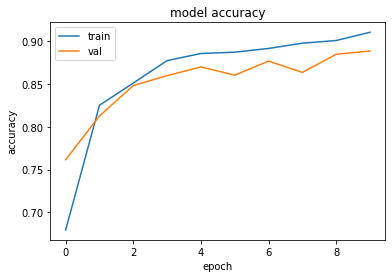

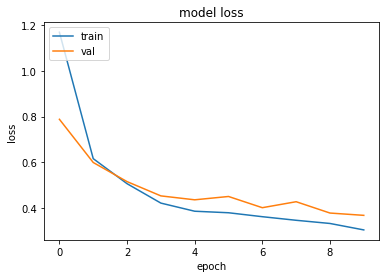

In [36]:
plot_acc_epoch(history1)
plot_loss_epoch(history1)

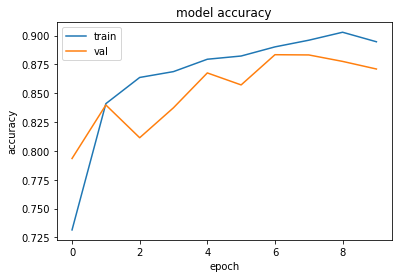

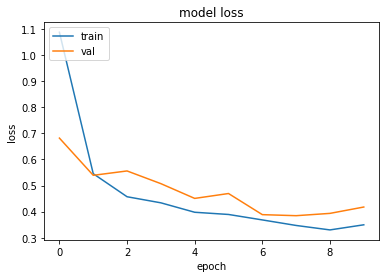

In [37]:
plot_acc_epoch(history2)
plot_loss_epoch(history2)

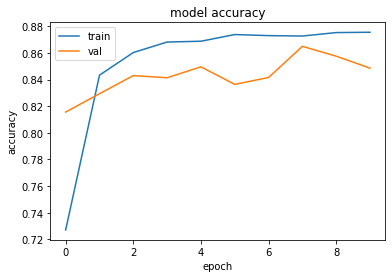

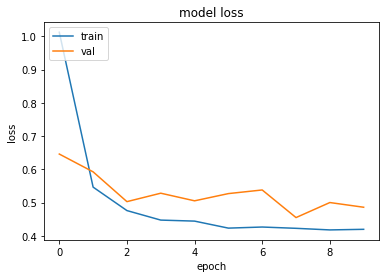

In [38]:
plot_acc_epoch(history3)
plot_loss_epoch(history3)

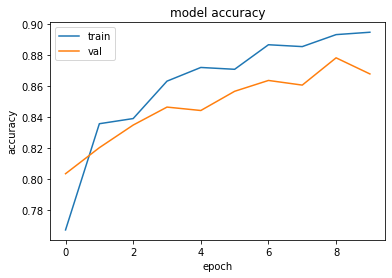

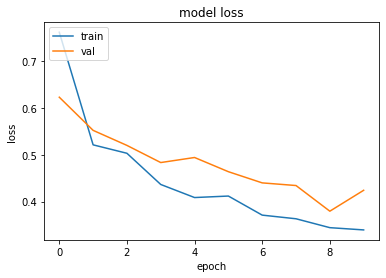

In [39]:
plot_acc_epoch(his4)
plot_loss_epoch(his4)

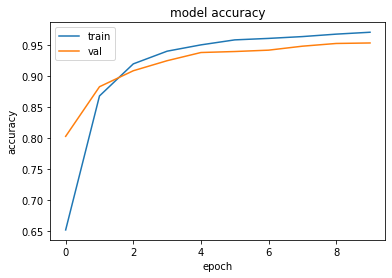

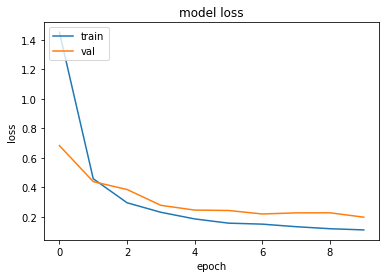

In [40]:
plot_acc_epoch(his5)
plot_loss_epoch(his5)

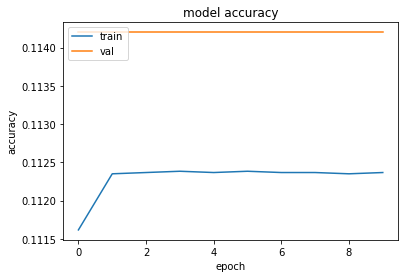

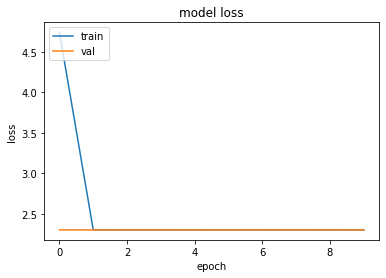

In [41]:
plot_acc_epoch(his6)
plot_loss_epoch(his6)

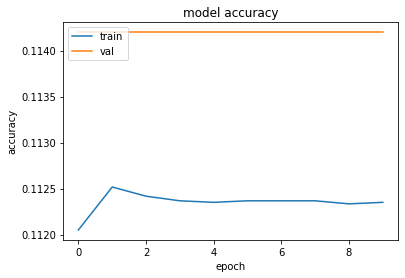

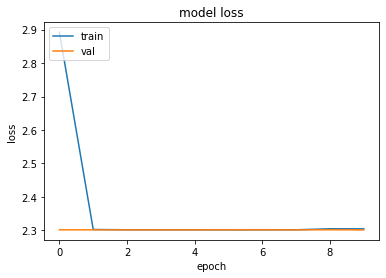

In [42]:
plot_acc_epoch(his7)
plot_loss_epoch(his7)

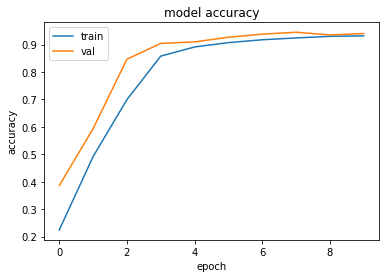

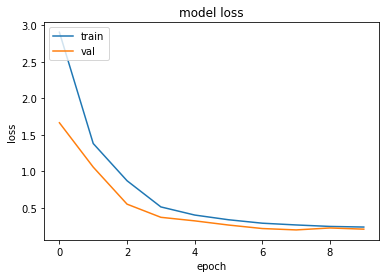

In [43]:
plot_acc_epoch(his8)
plot_loss_epoch(his8)

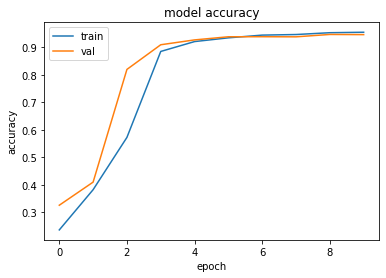

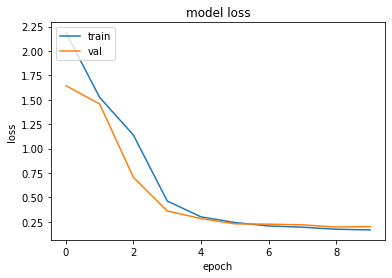

In [44]:
plot_acc_epoch(his9)
plot_loss_epoch(his9)

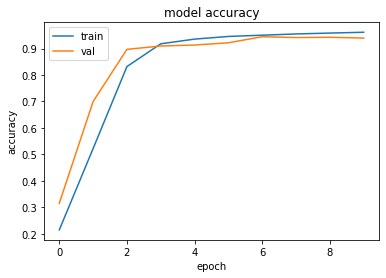

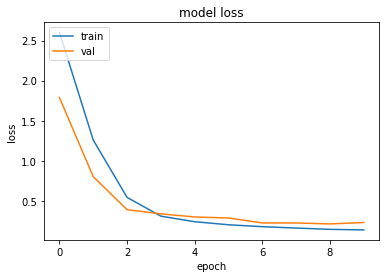

In [45]:
plot_acc_epoch(his10)
plot_loss_epoch(his10)

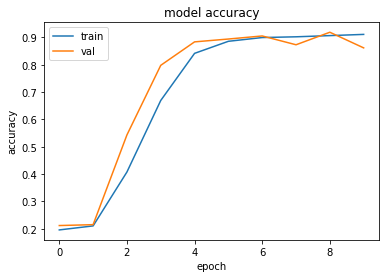

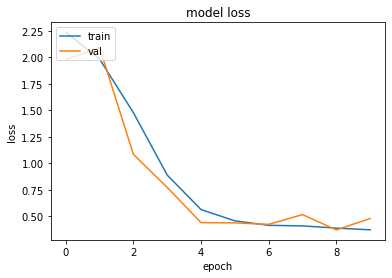

In [46]:
plot_acc_epoch(his11)
plot_loss_epoch(his11)

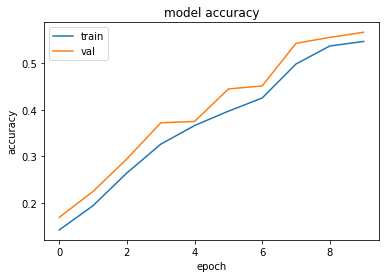

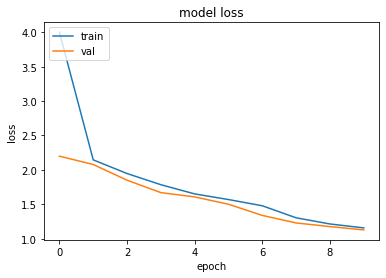

In [47]:
plot_acc_epoch(his12)
plot_loss_epoch(his12)

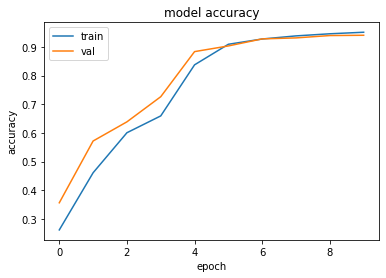

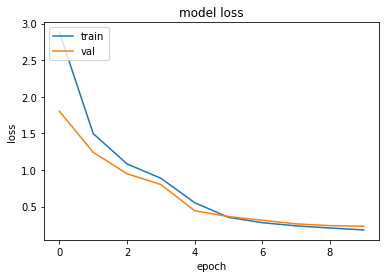

In [48]:
plot_acc_epoch(his13)
plot_loss_epoch(his13)

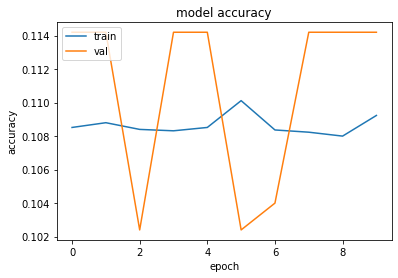

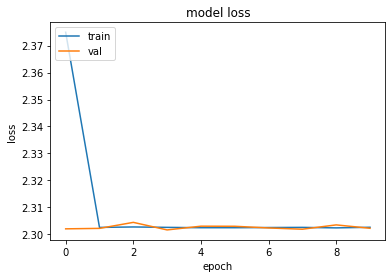

In [49]:
plot_acc_epoch(his14)
plot_loss_epoch(his14)

In [50]:
#model10 gives the best accuracy : relu dropout 0.1 lr 0.001 3 hidden layers

In [51]:
def check_image(x):
    img=x_test[x]
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    img1=img.reshape((1,28,28))
    ans=model10.predict(img1)
    mx=max(ans[0])
    for i in range(10):
        if ans[0][i]==mx:
            print(i+1)

9


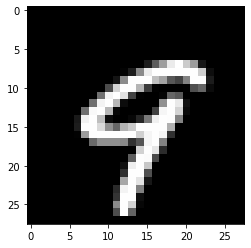

In [56]:
check_image(9)

3


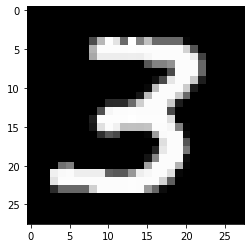

In [57]:
check_image(150)

3


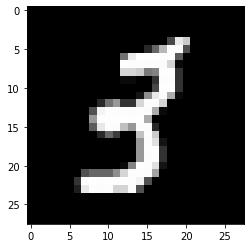

In [58]:
check_image(62)

6


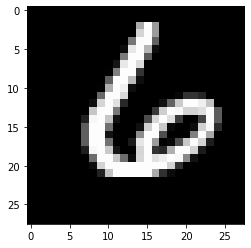

In [59]:
check_image(12)

1


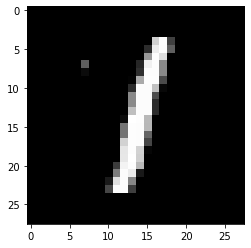

In [60]:
check_image(156)

5


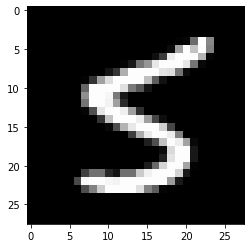

In [62]:
check_image(160)

4


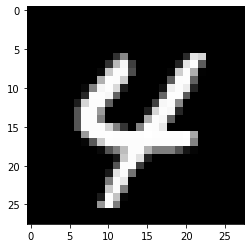

In [63]:
check_image(123)

In [ ]:
#Calculating Fscore and Confusion Matrix
def fscore_and_confusion_matrix(model):
#     fs=f1_score(y_test,model.predict(X_test))
    fs=5
    mat=confusion_matrix(y_test,model.predict(X_test))
    print(str(model))
    print("The Fscore for is "+str(fs)+"\n"+"The confusion Matrix \n"+mat)